In [ ]:
#с подбором коэффов
import numpy as np
import heapq

# Исходное и целевое состояние
initial_state = np.array([[2, 1, 6],
                           [4, 0, 8],
                           [7, 5, 3]])

goal_state = np.array([[1, 2, 3],
                       [8, 0, 4],
                       [7, 6, 5]])

# #пример с пары
# initial_state = np.array([[2, 4, 3],
#                            [1, 8, 5],
#                            [7, 0, 6]])

# goal_state = np.array([[1, 2, 3],
#                        [4, 5, 6],
#                        [7, 8, 0]])

# Функция для подсчета G (количество фишек не на своем месте)
def calculate_G(state):
    return np.sum(state.flatten() != goal_state.flatten())

# Функция для получения возможных ходов
def get_possible_moves(state):
    moves = []
    zero_pos = np.argwhere(state == 0)[0]
    x, y = zero_pos

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for dx, dy in directions:
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < 3 and 0 <= new_y < 3:
            new_state = state.copy()
            new_state[x, y], new_state[new_x, new_y] = new_state[new_x, new_y], new_state[x, y]
            moves.append(new_state)

    return moves

# Функция для поиска наилучшего пути с визуализацией
def a_star_search(initial_state, weight_G=1, weight_H=1):
    queue = []
    heapq.heappush(queue, (0, tuple(map(tuple, initial_state)), 0))  # F, состояние и количество ходов
    visited = set()
    parent_map = {}

    total_generated_states = 0

    # Множество для хранения всех уникальных состояний
    all_generated_states = set()

    while queue:
        F, current_state_tuple, h = heapq.heappop(queue)
        current_state = np.array(current_state_tuple)

        # Добавляем текущее состояние в множество всех сгенерированных состояний
        all_generated_states.add(current_state_tuple)
        total_generated_states += 1  # Увеличиваем счётчик сгенерированных состояний

        if np.array_equal(current_state, goal_state):
            path = []
            state_tuple = current_state_tuple
            while state_tuple is not None:
                path.append(np.array(state_tuple))
                state_tuple = parent_map.get(state_tuple, None)
            return path[::-1], len(path), total_generated_states

        visited.add(current_state_tuple)

        for move in get_possible_moves(current_state):
            move_tuple = tuple(map(tuple, move))
            if move_tuple not in visited:
                G = calculate_G(move)
                new_F = weight_G * G + weight_H * (h + 1)
                heapq.heappush(queue, (new_F, move_tuple, h + 1))
                parent_map[move_tuple] = current_state_tuple
                total_generated_states += 1

    return None, 0, total_generated_states

# Перебор коэффициентов
best_efficiency = 0
best_weights = (1, 1)
best_result = None

for weight_G in range(1, 6):  # Пробуем коэффициенты от 1 до 5
    for weight_H in range(1, 6):
        solution_path, optimal_states_count, total_generated_states = a_star_search(initial_state, weight_G, weight_H)

        # Вычисление КПД
        efficiency = optimal_states_count / (total_generated_states - optimal_states_count) if total_generated_states > optimal_states_count else 0

        if efficiency > best_efficiency:
            best_efficiency = efficiency
            best_weights = (weight_G, weight_H)
            best_result = (solution_path, optimal_states_count, total_generated_states)

# Вывод результатов с наилучшими коэффициентами
if best_result:
    solution_path, optimal_states_count, total_generated_states = best_result
    print(f"\nЛучшие коэффициенты: G={best_weights[0]}, H={best_weights[1]}")
    print(f"Количество шагов до решения: {optimal_states_count}")
    print(f"КПД: {optimal_states_count}/{total_generated_states - optimal_states_count} = {best_efficiency:.2%}")

    # Визуализация пути
    if solution_path:
        print("\nПуть к решению:")
        for idx, state in enumerate(solution_path):
            print(f"Шаг {idx-1 if idx > 0 else 0}:")
            print("\n".join(" ".join(str(cell) for cell in row) for row in state))
            G = calculate_G(state)
            H = idx if idx > 0 else 1
            F = best_weights[0] * G + best_weights[1] * (idx)
            print(f"G: {G}, H: {H-1}, F: {F-1}\n")


Лучшие коэффициенты: G=3, H=1
Количество шагов до решения: 19
КПД: 19/1109 = 1.71%

Путь к решению:
Шаг 0:
2 1 6
4 0 8
7 5 3
G: 7, H: 0, F: 20

Шаг 0:
2 1 6
4 8 0
7 5 3
G: 8, H: 0, F: 24

Шаг 1:
2 1 0
4 8 6
7 5 3
G: 8, H: 1, F: 25

Шаг 2:
2 0 1
4 8 6
7 5 3
G: 8, H: 2, F: 26

Шаг 3:
2 8 1
4 0 6
7 5 3
G: 7, H: 3, F: 24

Шаг 4:
2 8 1
4 6 0
7 5 3
G: 8, H: 4, F: 28

Шаг 5:
2 8 1
4 6 3
7 5 0
G: 8, H: 5, F: 29

Шаг 6:
2 8 1
4 6 3
7 0 5
G: 7, H: 6, F: 27

Шаг 7:
2 8 1
4 0 3
7 6 5
G: 5, H: 7, F: 22

Шаг 8:
2 8 1
0 4 3
7 6 5
G: 6, H: 8, F: 26

Шаг 9:
0 8 1
2 4 3
7 6 5
G: 6, H: 9, F: 27

Шаг 10:
8 0 1
2 4 3
7 6 5
G: 6, H: 10, F: 28

Шаг 11:
8 1 0
2 4 3
7 6 5
G: 6, H: 11, F: 29

Шаг 12:
8 1 3
2 4 0
7 6 5
G: 5, H: 12, F: 27

Шаг 13:
8 1 3
2 0 4
7 6 5
G: 3, H: 13, F: 22

Шаг 14:
8 1 3
0 2 4
7 6 5
G: 4, H: 14, F: 26

Шаг 15:
0 1 3
8 2 4
7 6 5
G: 3, H: 15, F: 24

Шаг 16:
1 0 3
8 2 4
7 6 5
G: 2, H: 16, F: 22

Шаг 17:
1 2 3
8 0 4
7 6 5
G: 0, H: 17, F: 17



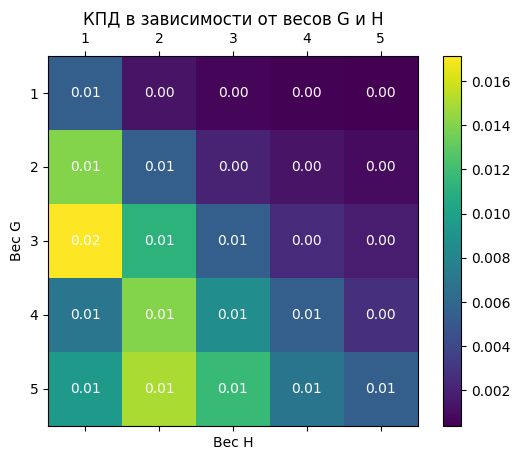

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_efficiency(initial_state, a_star_search):
    efficiencies = np.zeros((5, 5))
    for weight_G in range(1, 6):
        for weight_H in range(1, 6):
            _, optimal_states_count, total_generated_states = a_star_search(initial_state, weight_G, weight_H)
            efficiency = optimal_states_count / (total_generated_states - optimal_states_count) if total_generated_states > optimal_states_count else 0
            efficiencies[weight_G-1, weight_H-1] = efficiency

    fig, ax = plt.subplots()
    cax = ax.matshow(efficiencies, cmap='viridis')
    fig.colorbar(cax)

    ax.set_xticks(np.arange(5))
    ax.set_yticks(np.arange(5))
    ax.set_xticklabels(range(1, 6))
    ax.set_yticklabels(range(1, 6))
    ax.set_xlabel('Вес H')
    ax.set_ylabel('Вес G')
    ax.set_title('КПД в зависимости от весов G и H')

    for i in range(5):
        for j in range(5):
            ax.text(j, i, f'{efficiencies[i, j]:.2f}', va='center', ha='center', color='w')

    plt.show()

# Пример вызова функции
visualize_efficiency(initial_state, a_star_search)

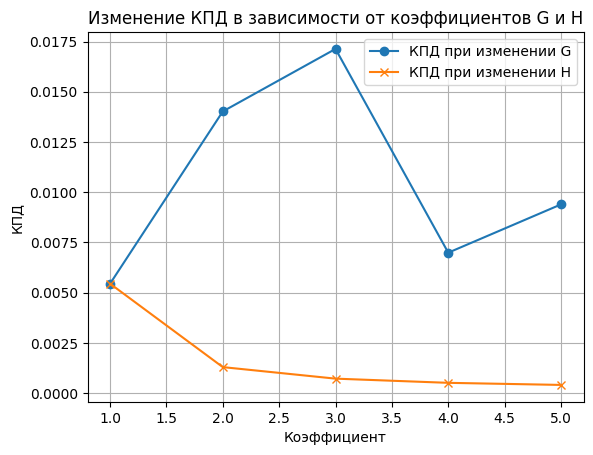

In [ ]:
# Функция для поиска наилучшего пути с визуализацией
def a_star_search(initial_state, weight_G=1, weight_H=1):
    queue = []
    heapq.heappush(queue, (0, tuple(map(tuple, initial_state)), 0))  # F, состояние и количество ходов
    visited = set()
    parent_map = {}

    total_generated_states = 0

    while queue:
        F, current_state_tuple, h = heapq.heappop(queue)
        current_state = np.array(current_state_tuple)

        total_generated_states += 1  # Увеличиваем счётчик сгенерированных состояний

        if np.array_equal(current_state, goal_state):
            path = []
            state_tuple = current_state_tuple
            while state_tuple is not None:
                path.append(np.array(state_tuple))
                state_tuple = parent_map.get(state_tuple, None)
            return path[::-1], len(path), total_generated_states

        visited.add(current_state_tuple)

        for move in get_possible_moves(current_state):
            move_tuple = tuple(map(tuple, move))
            if move_tuple not in visited:
                G = calculate_G(move)
                new_F = weight_G * G + weight_H * (h + 1)
                heapq.heappush(queue, (new_F, move_tuple, h + 1))
                parent_map[move_tuple] = current_state_tuple
                total_generated_states += 1

    return None, 0, total_generated_states

# Визуализация КПД в зависимости от коэффициентов G и H
def visualize_efficiency(initial_state):
    efficiencies_G = []
    efficiencies_H = []

    for weight_G in range(1, 6):
        solution_path, optimal_states_count, total_generated_states = a_star_search(initial_state, weight_G, 1)
        efficiency = optimal_states_count / (total_generated_states - optimal_states_count) if total_generated_states > optimal_states_count else 0
        efficiencies_G.append(efficiency)

    for weight_H in range(1, 6):
        solution_path, optimal_states_count, total_generated_states = a_star_search(initial_state, 1, weight_H)
        efficiency = optimal_states_count / (total_generated_states - optimal_states_count) if total_generated_states > optimal_states_count else 0
        efficiencies_H.append(efficiency)

    plt.plot(range(1, 6), efficiencies_G, label='КПД при изменении G', marker='o')
    plt.plot(range(1, 6), efficiencies_H, label='КПД при изменении H', marker='x')
    plt.xlabel('Коэффициент')
    plt.ylabel('КПД')
    plt.title('Изменение КПД в зависимости от коэффициентов G и H')
    plt.legend()
    plt.grid(True)
    plt.show()

# Пример вызова функции визуализации
visualize_efficiency(initial_state)

In [ ]:
#h - количество шагов, необходимое для достижения цели ->min
#g - количество фишек не на своих местах ->min
#f - тактика